## ROC, AUC

ROC curve, Receiver Operating Characteristic curve, 接收者操作特征曲线，ROC 曲线，是一种坐标图式的分析工具，用于：

1. 选择最佳的信号侦测模型、舍弃次佳的模型;
2. 在同一模型中设定最佳阈值。

在做决策时，ROC 分析能不受成本 / 效益的影响，给出中立的建议。

TL;DR;

- (0, 1) 是 ROC 空间的最佳点。x 轴为 FPR, y 轴为 TPR.
- AUC 的范围在 [0.1， 1] 之间，值越大越好。被预测为正类的概率。


### 基本概念

对于一个二元分类器。其混淆矩阵(confusion matrix) 也称为列联表(contingency table) 可以用如下的表表示：

|- |P|N|
|------|------|------|
|**P'**|   TP |  FP  |
|**N'**|   FN |  TN  |

- P, N 为实际类别。
- P', N' 为预测类别。
- TP **真阳性**，实际为正样本，被预测成正样本的个数。
- FP **假阳性**，实际为负样本，被预测成正样本的个数。
- TN **真阴性**，实际为负样本，被预测成负样本的个数。
- FN **假阴性**，实际为正样本，被预测成负样本的个数。


### ROC 空间

ROC 空间是一个二维空间，其 X 轴为假阳率(FPR), 而 Y 轴为真阳率 (TPR)，两个轴的取值范围都是 [0, 1]。

- TPR: 被正确预测成正样本的与所有实际为正样本的比率。

$$
TPR = \frac{TP}{TP + FN}
$$

- FPR: 实际负样本被错误的预测成正样本与所有负样本的比率。

$$
FPR = \frac{FP}{FP + TN}
$$

给定一个二元分类模型和它的**阈值**，就可以得到一个 (x=fpr, y=tpr) 的坐标点。


真阳性率，TPR (true positive rate) 又称为命中率（hit rate),**敏感度（sensitivity)**.

真阴性率，TNR (SPC, Specificity) 又称为**特异度**，SPC = 1 - FPR.


#### Ex.1

|- |P|N|
|------|------|------|
|**P'**|   TP = 63 |  FP = 28 |
|**N'**|   FN = 37 |  TN = 72 |

- FPR = 0.28
- TPR = 0.63

对于一个分类模型，在 ROC 空间上的点为 **(0, 1)** 就一个最优的模型。

<img src="https://upload.wikimedia.org/wikipedia/commons/3/36/ROC_space-2.png" width="300px">

### ROC 曲线

给定一个模型，我们能算出其 ROC 空间中一个点，那么我们怎么才能画出一个曲线那？

其实在画 ROC 曲线时，我们需要一个用来划分正类的**阈值（threshold)**, 当这个阈值改变时，就会得到新的点，然后根据这些点就可以画出我们的 ROC 曲线了。

#### Ex2. 

假设我以下测试样本集: $\{(\vec x_1, 0), (\vec x_2, 0), (\vec x_3, 1), (\vec x_2, 1)\}$, 其中有 4 个样本。其中标签 1 为正类，0 为负类。我们无需关心样本的特征向量。

假设我们有一个分类器，在训练之后，对这个四个样本的特征进行打分后给出了一个下面的打分 (scores) $[0.1, 0.4, 0.35, 0.8]$。那么我的划分正类的阈值可以分别取 $1, 0.8, 0.4, 0.35, 0.1$ 来观察下对应的 ROC 点。

##### threshold = 1.8 时

- 小于该阈值都为负类的样本为: $\{\vec x_1, \vec x_2, \vec x_3, \vec x_4\}$
- 大于等于该阈值为正类的样本为; $\emptyset$

即其混淆矩阵为：


|- |P|N|
|------|------|------|
|**P'**|   0 |  0 |
|**N'**|   2 |  2 |

对就的 ROC 点为 (0, 0)

##### threshold = 0.8 时

- 小于该阈值都为负类的样本为: $\{\vec x_1, \vec x_2, \vec x_3 \}$
- 大于等于该阈值为正类的样本为; $\{\vec x_4 \}$

即其混淆矩阵为：


|- |P|N|
|------|------|------|
|**P'**|   1 |  0 |
|**N'**|   1 |  2 |

对就的 ROC 点为 (0, 0.5)

##### threshold = 0.4 时

- 小于该阈值都为负类的样本为: $\{\vec x_1,  \vec x_3 \}$
- 大于等于该阈值为正类的样本为; $\{\vec x_2, \vec x_4 \}$

即其混淆矩阵为：


|- |P|N|
|------|------|------|
|**P'**|   1 |  1 |
|**N'**|   1 |  1 |

对就的 ROC 点为 (0.5, 0.5)

##### threshold = 0.35 时

- 小于该阈值都为负类的样本为: $\{\vec x_1 \}$
- 大于等于该阈值为正类的样本为; $\{\vec x_2,  \vec x_3 ,\vec x_4 \}$

即其混淆矩阵为：


|- |P|N|
|------|------|------|
|**P'**|   2 |  1 |
|**N'**|   0 |  1 |

对就的 ROC 点为 (0.5, 1)

##### threshold = 0.1 时

- 小于该阈值都为负类的样本为: $\emptyset $
- 大于等于该阈值为正类的样本为; $\{\vec x_1, \vec x_2,  \vec x_3 ,\vec x_4 \}$

即其混淆矩阵为：


|- |P|N|
|------|------|------|
|**P'**|   2 |  2 |
|**N'**|   0 |  0 |

对就的 ROC 点为 (1, 1)。

通过下面的程序可以画出其对应的 ROC 曲线。


threshold = 1.80, (fpr, tpr) = (0.0, 0.0)
threshold = 0.80, (fpr, tpr) = (0.0, 0.5)
threshold = 0.40, (fpr, tpr) = (0.5, 0.5)
threshold = 0.35, (fpr, tpr) = (0.5, 1.0)
threshold = 0.10, (fpr, tpr) = (1.0, 1.0)


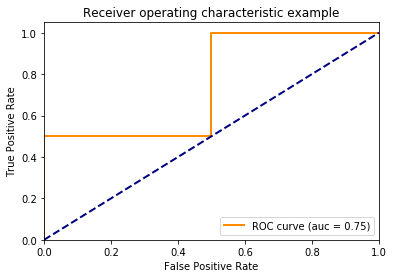

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


y = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = roc_curve(y, y_scores, pos_label = 1)

for fr, tr, val in zip(fpr, tpr, thresholds):
    print("threshold = {0:0.2f}, (fpr, tpr) = ({1}, {2})".
         format(val, fr, tr))
    
auc = roc_auc_score(y, y_scores)
    
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (auc = {0:0.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### AUC

Area Under Curve, Roc 线下面积怎么计算那？


Roc曲线下的面积，介于0.1和1之间。Auc作为数值可以直观的评价分类器的好坏，**值越大越好**。

首先AUC值是一个概率值，当你随机挑选一个正样本以及负样本，当前的分类算法根据计算得到的 Score 值将这个**正样本排在负样本**前面的概率就是 AUC 值，AUC值越大，当前分类算法越有可能将正样本排在负样本前面，从而能够更好地分类。

In [12]:
print(roc_auc_score(y, y_scores))

0.75


### 总结 

ROC是一个用于度量分类中的非均衡性的工具，ROC曲线及AUC常被用来评价一个二值分类器的优劣。

既然已经有了这么多的评价指标，为什么还要使用ROC与AUC呢？

因为ROC曲线有一个很好的特征：在实际的数据集中经常会出现类别不平衡现象，即负样本比正样本多很多（或者相反），而且测试数据中的正负样本的分布也可能随着时间而变化。而在这种情况下，**ROC曲线能够保持不变**。下图是 ROC曲线 和 Precison-Recall曲线的对比。

<img src="http://alexkong.net/images/roc-and-precall.png" width="460px">

在上图中，a、c为 ROC 曲线，b、d为 Precison 和 Recall 曲线。a、b展示的是在原始测试集（正负样本平衡）的结果，c、d是将测试集中负样本的数量变为原来的**10倍**后分类器的结果。可以看出，ROC 曲线基本保持不变，而 Precison 和 Recall 变化较大。